In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# from scipy.optimize import fsolve
import plotly.graph_objects as go
# from matplotlib.animation import FuncAnimation
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation, PillowWriter
# from mayavi import mlab
from scipy.optimize import root_scalar

In [4]:
# 常量定义
c = 2.998e8  # 光速 [m/s]
qe = 1.609e-19  # 元电荷 [C]
me = 9.11e-31  # 电子质量 [kg]
# 变量输入
gamma = 70 # 洛伦兹因子，无量纲
beta = np.sqrt(1 - 1/gamma**2) # 相对论速度，无量纲
B = 2.5e-5 # 磁场横向分量 [T]

# 变量计算
v0 = c * beta  # 电子束速度，单位 [m/s]
wB = qe * B / (gamma * me)  # 回旋频率
# Rc = 1.7e-3*beta*gamma/B # 垂直情况下回旋半径 [m]
a0_max = v0 / wB  # 最大回转半径 [m]


In [22]:
# 求解发射角theta   
def a0(theta):
    return a0_max * np.sin(theta)

def theta_equation(theta, R, Psi):
    a0_val = a0(theta)
    return R * np.sin(Psi) - a0_val * np.sqrt(2 * (1 - np.cos(wB * R * np.cos(Psi) / (v0 * np.cos(theta)))))

def tau(R, theta,Psi):
    return R * np.cos(Psi) / v0 / np.cos(theta)

R_test = 19e3  # [m] 
Psi_test = 0.5 # [rad]

def find_bracket(func, R, Psi, theta_min=0.01, theta_max=np.pi/2, num=1000):
    theta_test = np.linspace(theta_min, theta_max, num)
    f_test = [func(theta, R, Psi) for theta in theta_test]
    for i in range(len(f_test)-1):
        if f_test[i] * f_test[i+1] < 0:
            return [theta_test[i], theta_test[i+1]]
    return None

bracket = find_bracket(theta_equation, R_test, Psi_test)
if bracket is not None:
    sol = root_scalar(theta_equation, args=(R_test, Psi_test), bracket=bracket, method='brentq')
    theta_val = sol.root if sol.converged else None
    tau_val = tau(R_test,theta_val,Psi_test)
    print("theta (rad) =", theta_val)
    print("theta (deg) =", np.degrees(theta_val))
    print("tau (microsec) = ", tau_val*1e6)

theta (rad) = 1.3402532639642761
theta (deg) = 76.79085550378609
tau (microsec) =  243.4199623039297


轨道夹角为-79.9度


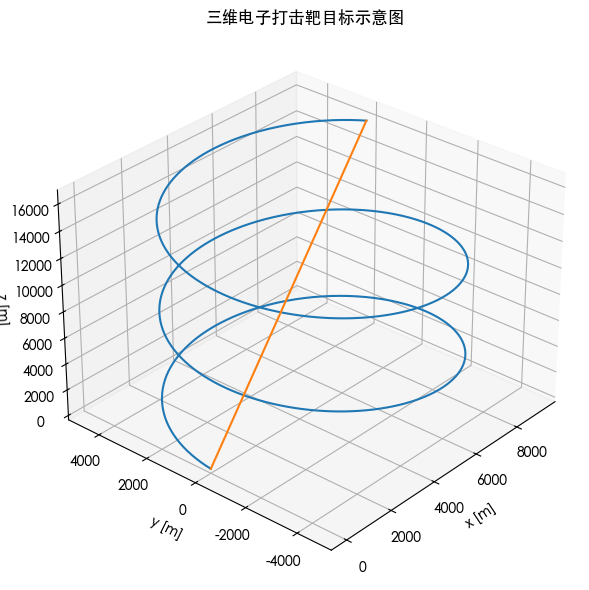

In [36]:
# 电子轨迹3D图
a0_val = a0(theta_val)
# 时间参数
t = np.linspace(0, tau_val, 1000)
# 轨迹方程
x = a0_val * (1 - np.cos(wB * t))
y = a0_val * np.sin(wB * t)
z = v0 * np.cos(theta_val) * t
# 靶目标位置
xT = a0_val * (1 - np.cos(wB * tau_val))
yT = a0_val * np.sin(wB * tau_val)
zT = v0 * np.cos(theta_val) * tau_val
# 坐标变换，y-y'夹角
phi = np.arctan2(-xT,yT)
print(f"轨道夹角为{np.rad2deg(phi):.1f}度")

matplotlib.rcParams['font.sans-serif'] = ['Heiti TC', 'STHeiti', 'SimHei', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot([0, xT], [0, yT], [0, zT])
# ax.set_xlim([0, 0.1*a0_val])
# ax.set_ylim([0, 0.1*a0_val])
# ax.set_zlim([0, np.max(z)])
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_title('三维电子打击靶目标示意图')
rot_angle = -60+np.rad2deg(phi).astype(int)
ax.view_init(elev=30, azim=rot_angle)

plt.tight_layout()
# plt.savefig(f'particle_trajectory_R{(R_test)}_Psi{(Psi_test)}.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# # 电子轨迹3D图
# theta = np.deg2rad(30) # 速度与磁场方向夹角
# a0 = v0 * np.sin(theta) / wB # 有夹角情况下的回转半径 [m]
# # 时间参数
# t = np.linspace(0, 2 * np.pi / wB * 5, 1000)  # 画5圈
# # 轨迹方程
# x = a0 * (1 - np.cos(wB * t))
# y = a0 * np.sin(wB * t)
# z = v0 * np.cos(theta) * t
# matplotlib.rcParams['font.sans-serif'] = ['Heiti TC', 'STHeiti', 'SimHei', 'Arial Unicode MS']
# matplotlib.rcParams['axes.unicode_minus'] = False

# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(x, y, z)
# ax.set_xlim([0, 2*a0])
# ax.set_ylim([-a0, a0])
# ax.set_zlim([0, np.max(z)])
# ax.set_xlabel('x [m]')
# ax.set_ylabel('y [m]')
# ax.set_zlabel('z [m]')
# ax.set_title('三维电子回旋轨迹图')

# # B场箭头
# arrow_len = 0.3 * np.max(z)
# ax.quiver(0, 0, 0, 0, 0, arrow_len, color='b', linewidth=3, arrow_length_ratio=0.02)
# ax.text(0, 0, arrow_len*1.1, r'$\vec{B}$', color='b', fontsize=14)

# # 初速度箭头
# v_arrow_len = 0.3 * np.max(z)
# vy = v_arrow_len * np.sin(theta)
# vz = v_arrow_len * np.cos(theta)
# ax.quiver(0, 0, 0, 0, 0.3*vy, 0.3*vz, color='r', linewidth=3, arrow_length_ratio=0.25)
# ax.text(0, vy*0.3, vz*0.3, r'$\vec{v}_0$', color='r', fontsize=14)

# plt.tight_layout()
# plt.savefig('particle_trajectory.png', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
# # 动画绘制
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection='3d')
# line, = ax.plot([], [], [], lw=2)
# ax.set_xlim([0, 2*a0])
# ax.set_ylim([-a0, a0])
# ax.set_zlim([0, np.max(z)])
# ax.set_xlabel('x [m]')
# ax.set_ylabel('y [m]')
# ax.set_zlabel('z [m]')
# ax.set_title('Particle Trajectory Animation')

# def init():
#     line.set_data([], [])
#     line.set_3d_properties([])
#     return line,

# def update(frame):
#     line.set_data(x[:frame], y[:frame])
#     line.set_3d_properties(z[:frame])
#     return line,

# ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True)
# ani.save('particle_trajectory.gif', writer=PillowWriter(fps=60))
# plt.show()

In [ ]:
# fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='lines')])
# fig.update_layout(scene=dict(
#     xaxis_title='x [m]',
#     yaxis_title='y [m]',
#     zaxis_title='z [m]'
# ))
# fig.show()

In [ ]:
# # 生成帧，每一帧显示到当前时刻的轨迹
# frames = [go.Frame(data=[go.Scatter3d(x=x[:k], y=y[:k], z=z[:k], mode='lines')],
#                    name=str(k)) for k in range(1, len(x), 10)]

# # 固定坐标轴范围
# x_range = [np.min(x), np.max(x)]
# y_range = [np.min(y), np.max(y)]
# z_range = [np.min(z), np.max(z)]

# fig = go.Figure(
#     data=[go.Scatter3d(x=[x[0]], y=[y[0]], z=[z[0]], mode='lines')],
#     layout=go.Layout(
#         scene=dict(
#             xaxis=dict(title='x [m]', range=x_range),
#             yaxis=dict(title='y [m]', range=y_range),
#             zaxis=dict(title='z [m]', range=z_range)
#         ),
#         updatemenus=[dict(
#             type='buttons',
#             showactive=False,
#             buttons=[dict(label='Play',
#                           method='animate',
#                           args=[None, dict(frame=dict(duration=30, redraw=True), fromcurrent=True)])]
#         )]
#     ),
#     frames=frames
# )

# fig.show()